# Ant Colony Optimization (Ant System)

In [1]:
import matplotlib.pyplot as plt
import time
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

from ACO import *
from SA import *

In [2]:
#Inicialización instancia TSP desde archivo de texto

graph = []
points = []
with open('a50.txt') as f: #se puede cambiar el archivo mientras este tenga el mismo formato
    for line in f.readlines():
        city = line.split(' ')
        graph.append([int(city[0]) - 1, float(city[1]), float(city[2])])
        points.append([city[1], city[2]])

In [3]:
opt_path, opt_dist = ACO(graph, ants = 50, iterations = 20, alpha = 4.0, beta = 4.0, rho = 0.5, Q = 1.0) #Cambiar parametros

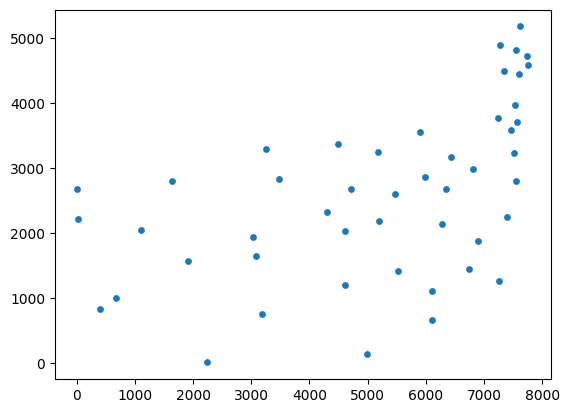

In [4]:
X, Y = [], []
for i in graph:
    X.append(i[1])
    Y.append(i[2])
plt.scatter(X, Y, marker='o', s=15)

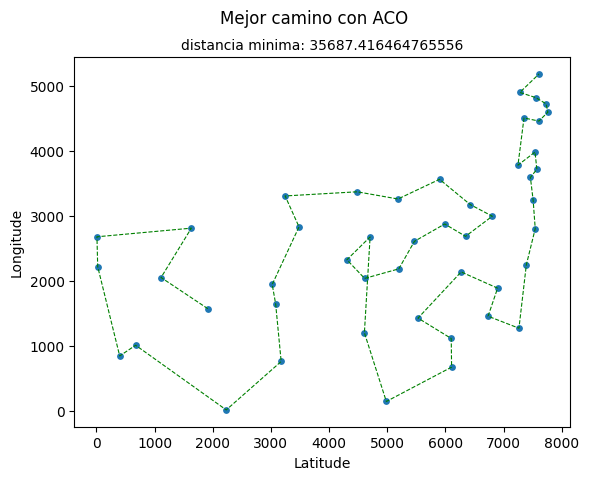

In [5]:
X_path, Y_path = [], []
for i in opt_path:
    X_path.append(graph[i][1])
    Y_path.append(graph[i][2])
    
plt.scatter(X, Y, marker='o', s=15)
plt.plot(X_path, Y_path, c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.suptitle('Mejor camino con ACO')
plt.title('distancia minima: {}'.format(opt_dist), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()

# Simulated Annealing

In [6]:
cost_matrix = []
for i in range(len(graph)):
    row = []
    for j in range(len(graph)):
        row.append(dist(graph[i], graph[j]))
    cost_matrix.append(row)

In [7]:
n = list(range(100000))
sigma = list(range(len(graph)))
P = sigma
f = lambda n,C : n^4
for i in n:
    P = Markov(P, i, cost_matrix, bn = f)

distancia = sum([cost_matrix[P[i]][P[i - 1]] for i in range(1, len(P))]) + cost_matrix[P[len(P) - 1]][P[0]]


C:\Users\yo\Downloads\SA.py:48: RuntimeWarning: overflow encountered in exp
  crit = np.exp(-beta*(omega(tau,D)-omega(Xn,D)))


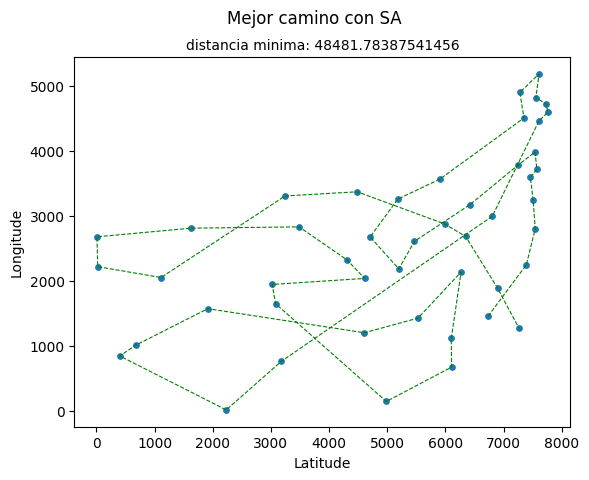

In [8]:
X_path, Y_path = [], []
for i in P:
    X_path.append(graph[i][1])
    Y_path.append(graph[i][2])

plt.scatter(X, Y, marker='o', s=15)
plt.plot(X_path, Y_path, c='g', linewidth=0.8, linestyle="--")

# propiedades plot
plt.suptitle('Mejor camino con SA')
plt.title('distancia minima: {}'.format(distancia), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Análisis de parámetros

In [9]:
graph_analisis = []
with open('a50.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_analisis.append([int(city[0]) - 1, float(city[1]), float(city[2])])

In [10]:
test_distances_beta = []
#se varia el beta, modificar para estudiar otros betas
for i in range(10):
    beta_test = 1.0 * i
    suma = 0 
    for j in range(1):
        opt_path_beta, opt_dist_beta = ACO(graph_analisis, ants = 50, iterations = 20, alpha = 1.0, beta = beta_test, rho = 0.5, Q = 1.0)
        suma += opt_dist_beta
    test_distances_beta.append(suma)

Text(0, 0.5, 'distancia optima')

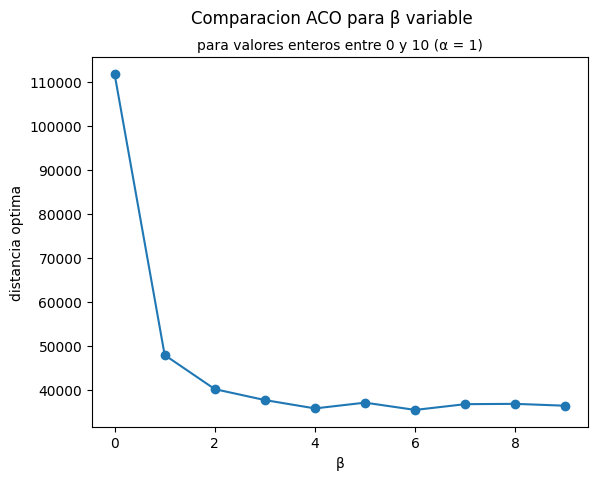

In [11]:
plt.scatter(list(range(10)), test_distances_beta)
plt.plot(list(range(10)), test_distances_beta)

plt.suptitle('Comparacion ACO para β variable')
plt.title('para valores enteros entre 0 y 10 (α = 1)', fontsize = 10)
plt.xlabel('β')
plt.ylabel('distancia optima')

In [12]:
test_distances_alpha = []
#se varia el alpha, modificar para estudiar otros alpha
for i in range(11):
    alpha_test = 1.0 * i
    suma = 0 
    for j in range(5):
        opt_path_alpha, opt_dist_alpha = ACO(graph_analisis, ants = 50, iterations = 20, alpha = alpha_test, beta = 5.0, rho = 0.5, Q = 1.0)
        suma += opt_dist_alpha
    test_distances_alpha.append(suma / 5)

Text(0, 0.5, 'distancia optima')

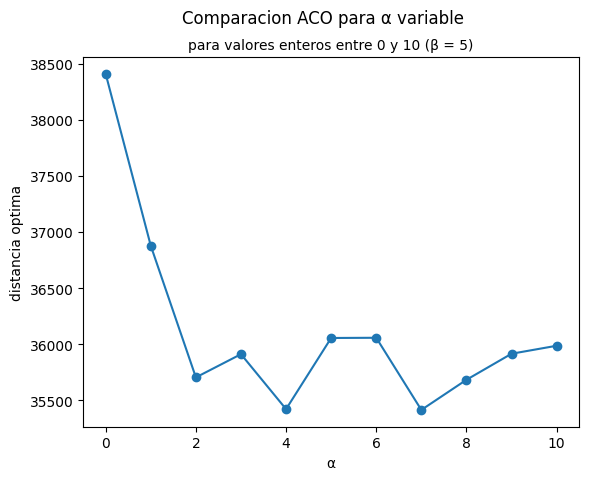

In [13]:
plt.scatter(list(range(11)), test_distances_alpha)
plt.plot(list(range(11)), test_distances_alpha)

plt.suptitle('Comparacion ACO para α variable')
plt.title('para valores enteros entre 0 y 10 (β = 5)', fontsize = 10)
plt.xlabel('α')
plt.ylabel('distancia optima')

### Heatmap entre α y β

In [14]:
opt_dist_matrix = np.zeros((9,9),float)

In [15]:
graph_analisis_heat = []
with open('a30.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_analisis_heat.append([int(city[0]) - 1, float(city[1]), float(city[2])])

In [16]:
for i in range(9): #m
    for j in range(9):
        beta_test = 1.0 * (i + 1)  #modificar para estudiar otros valores
        alpha_test = 1.0 * (j + 1) #modificar para estudiar otros valores
        suma = 0
        for k in range(10):
            opt_dist_heat = ACO(graph_analisis, ants = 30, iterations = 20, alpha = alpha_test, beta = beta_test, rho = 0.5, Q = 1.0)[1]
            suma += opt_dist_heat
        opt_dist_matrix[i, j] = suma / 10

([<matplotlib.axis.YTick at 0x293ae02eb10>,
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '4'),
  Text(0, 4, '5'),
  Text(0, 5, '6'),
  Text(0, 6, '7'),
  Text(0, 7, '8'),
  Text(0, 8, '9')])

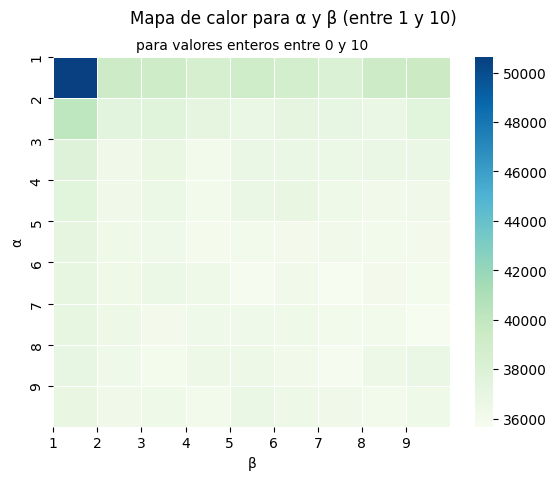

In [17]:
ax = sns.heatmap(opt_dist_matrix, linewidth=0.5, cmap = "GnBu")

plt.suptitle('Mapa de calor para α y β (entre 1 y 10)')
plt.title('para valores enteros entre 0 y 10', fontsize = 10)
plt.xlabel('β')
plt.ylabel('α')
plt.xticks(np.arange(9), np.arange(1, 9+1))
plt.yticks(np.arange(9), np.arange(1, 9+1))

### Análisis parámetro ρ

In [18]:
graph_analisis_rho = []
with open('a50.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_analisis_rho.append([int(city[0]) - 1, float(city[1]), float(city[2])])

In [19]:
test_distances_rho = []
for i in range(10):
    rho_test = 0.1 * i #cambiar por otra sucesion de rho
    suma = 0 
    for j in range(10):
        opt_path, opt_dist = ACO(graph_analisis_rho, ants = 30, iterations = 20, alpha = 4.0, beta = 4.0, rho = rho_test, Q = 1.0)
        suma += opt_dist
    test_distances_rho.append(suma / 10)

Text(0, 0.5, 'distancia mínima')

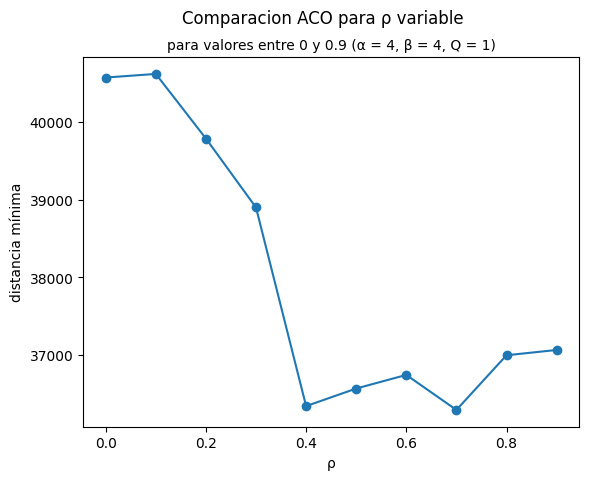

In [20]:
plt.scatter([0.1 * i for i in range(10)], test_distances_rho)
plt.plot([0.1 * i for i in range(10)], test_distances_rho)

plt.suptitle('Comparacion ACO para ρ variable')
plt.title('para valores entre 0 y 0.9 (α = 4, β = 4, Q = 1)', fontsize = 10)
plt.xlabel('ρ')
plt.ylabel('distancia mínima')

### Análisis parámetro Q

In [21]:
graph_analisis_Q = []
with open('a50.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_analisis_Q.append([int(city[0]) - 1, float(city[1]), float(city[2])])

In [22]:
test_distances_Q = []
for i in range(10):
    Q_test = 1.0 * i #cambiar por otra sucesion de Q
    suma = 0 
    for j in range(10):
        opt_pat_Q, opt_dist_Q = ACO(graph_analisis_Q, ants = 50, iterations = 20, alpha = 4.0, beta = 4.0, rho = 0.5, Q = Q_test)
        suma += opt_dist_Q
    test_distances_Q.append(suma / 10)

Text(0, 0.5, 'distancia mínima')

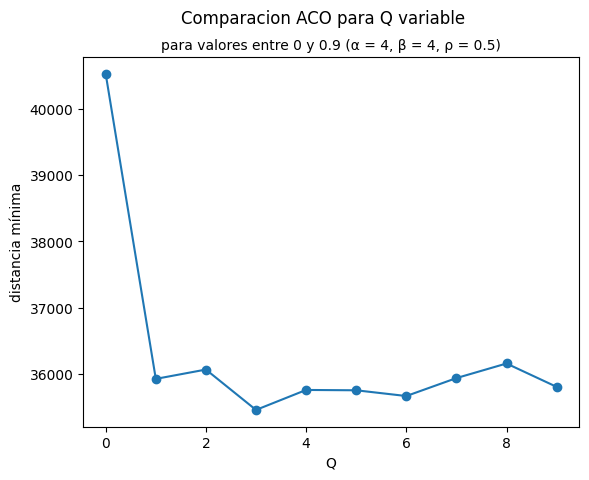

In [23]:
plt.scatter([1 * i for i in range(10)], test_distances_Q)
plt.plot([1 * i for i in range(10)], test_distances_Q)

plt.suptitle('Comparacion ACO para Q variable')
plt.title('para valores entre 0 y 0.9 (α = 4, β = 4, ρ = 0.5)', fontsize = 10)
plt.xlabel('Q')
plt.ylabel('distancia mínima')

### heatmap entre ρ y Q

In [24]:
opt_dist_matrix_2 = np.zeros((9,9),float)

In [25]:
graph_analisis_heat_2 = []
with open('a30.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_analisis_heat_2.append([int(city[0]) - 1, float(city[1]), float(city[2])])

In [26]:
for i in range(9):
    for j in range(9):
        rho_test = 0.1 * (i + 1) #modificar para estudiar otros valores
        Q_test = 1.0 * (j + 1) #modificar para estudiar otros valores
        suma = 0
        for k in range(10):
            opt_dist_heat_2 = ACO(graph_analisis_heat_2, ants = 30, iterations = 20, alpha = 4.0, beta = 4.0, rho = rho_test, Q = Q_test)[1]
            suma += opt_dist_heat_2
        opt_dist_matrix_2[i, j] = suma / 10

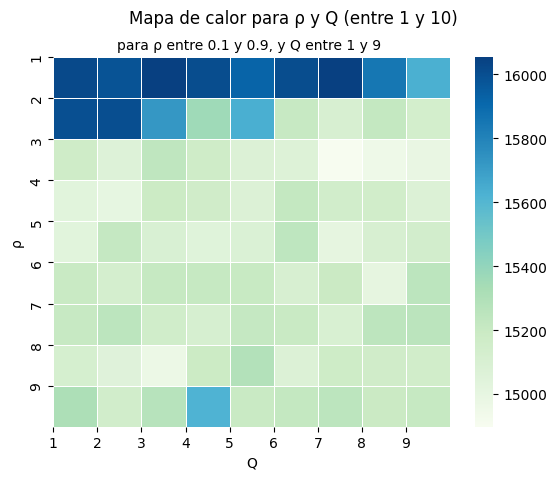

In [27]:
ax = sns.heatmap(opt_dist_matrix_2, linewidth=0.5, cmap = "GnBu")

plt.suptitle('Mapa de calor para ρ y Q (entre 1 y 10)')
plt.title('para ρ entre 0.1 y 0.9, y Q entre 1 y 9 ', fontsize = 10)
plt.xlabel('Q')
plt.ylabel('ρ')
plt.xticks(np.arange(9), np.arange(1, 9+1))
plt.yticks(np.arange(9), np.arange(1, 9+1))
plt.show()

# Comparación entre algoritmos

## Instancia de 30 ciudades:

In [28]:
graph_vs_1 = []
with open('a30.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_vs_1.append([int(city[0]) - 1, float(city[1]), float(city[2])])

X_vs_1, Y_vs_1 = [], []
for i in graph_vs_1:
    X_vs_1.append(i[1])
    Y_vs_1.append(i[2])

In [29]:
# ACO

start_time_ACO_1 = time.time()

opt_path_vs_1, opt_dist_vs_1 = ACO(graph_vs_1, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_1 = time.time()

ACO_time_1 = end_time_ACO_1 - start_time_ACO_1

#Simulated Annealing

cost_matrix = []
for i in range(len(graph_vs_1)):
    row = []
    for j in range(len(graph_vs_1)):
        row.append(dist(graph_vs_1[i], graph_vs_1[j]))
    cost_matrix.append(row)

start_time_SA_1 = time.time()

n = list(range(100000))

sigma = list(range(len(graph_vs_1)))
P_vs_1 = sigma

f = lambda n,C : n^4
for i in n:

    P_vs_1 = Markov(P_vs_1, i, cost_matrix, bn = f)


distancia_vs_1 = sum([cost_matrix[P_vs_1[i]][P_vs_1[i - 1]] for i in range(1, len(P_vs_1))]) + cost_matrix[P_vs_1[len(P_vs_1) - 1]][P_vs_1[0]]

end_time_SA_1 = time.time()
SA_time_1 = end_time_SA_1 - start_time_SA_1

C:\Users\yo\Downloads\SA.py:48: RuntimeWarning: overflow encountered in exp
  crit = np.exp(-beta*(omega(tau,D)-omega(Xn,D)))


Text(0.05, 0.95, 't = 3.478160858154297')

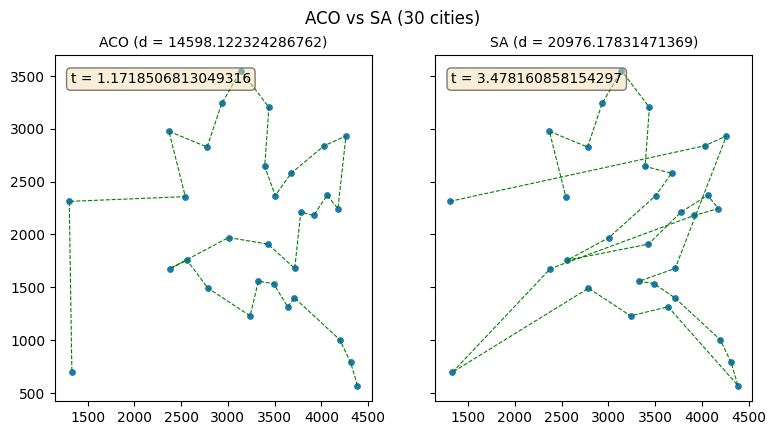

In [30]:
X_path_ACO_vs_1, Y_path_ACO_vs_1 = [], []
for i in opt_path_vs_1:
    X_path_ACO_vs_1.append(graph_vs_1[i][1])
    Y_path_ACO_vs_1.append(graph_vs_1[i][2])
    
X_path_AS_vs_1, Y_path_AS_vs_1 = [], []
for i in P_vs_1:
    X_path_AS_vs_1.append(graph_vs_1[i][1])
    Y_path_AS_vs_1.append(graph_vs_1[i][2])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(9, 4.5))
fig.suptitle('ACO vs SA (30 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_vs_1, Y_vs_1, marker='o', s=15)
ax1.plot(X_path_ACO_vs_1, Y_path_ACO_vs_1, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO (d = {})'.format(opt_dist_vs_1), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_1), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_vs_1, Y_vs_1, marker='o', s=15)
ax2.plot(X_path_AS_vs_1, Y_path_AS_vs_1, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('SA (d = {})'.format(distancia_vs_1), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(SA_time_1), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

## Instancia 50 ciudades

In [31]:
graph_vs_2 = []
with open('a50.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_vs_2.append([int(city[0]) - 1, float(city[1]), float(city[2])])

X_vs_2, Y_vs_2 = [], []
for i in graph_vs_2:
    X_vs_2.append(i[1])
    Y_vs_2.append(i[2])

In [32]:
# ACO

start_time_ACO_2 = time.time()

opt_path_vs_2, opt_dist_vs_2 = ACO(graph_vs_2, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_2 = time.time()

ACO_time_2 = end_time_ACO_2 - start_time_ACO_2

#Simulated Annealing

cost_matrix = []
for i in range(len(graph_vs_2)):
    row = []
    for j in range(len(graph_vs_2)):
        row.append(dist(graph_vs_2[i], graph_vs_2[j]))
    cost_matrix.append(row)

start_time_SA_2 = time.time()

n = list(range(100000))

sigma = list(range(len(graph_vs_2)))
P_vs_2 = sigma

f = lambda n,C : n^4
for i in n:

    P_vs_2 = Markov(P_vs_2, i, cost_matrix, bn = f)


distancia_vs_2 = sum([cost_matrix[P_vs_2[i]][P_vs_2[i - 1]] for i in range(1, len(P_vs_2))]) + cost_matrix[P_vs_2[len(P_vs_2) - 1]][P_vs_2[0]]

end_time_SA_2 = time.time()
SA_time_2 = end_time_SA_2 - start_time_SA_2

Text(0.05, 0.95, 't = 4.3141257762908936')

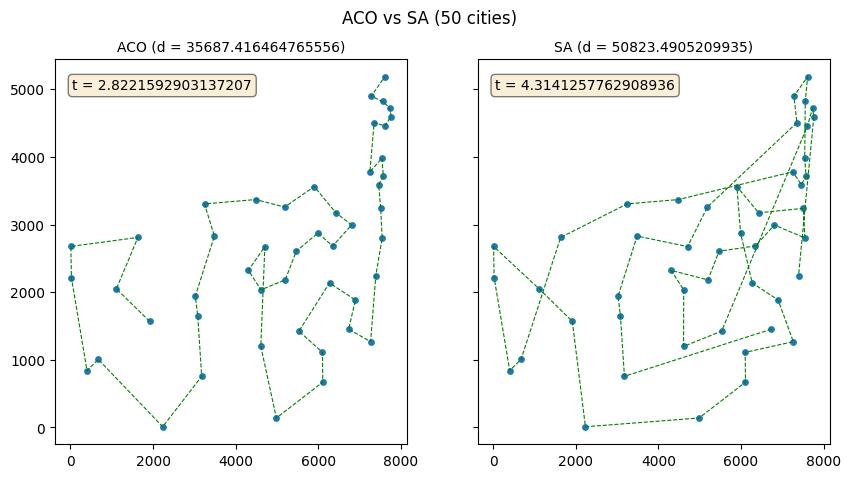

In [33]:
X_path_ACO_vs_2, Y_path_ACO_vs_2 = [], []
for i in opt_path_vs_2:
    X_path_ACO_vs_2.append(graph_vs_2[i][1])
    Y_path_ACO_vs_2.append(graph_vs_2[i][2])
    
X_path_AS_vs_2, Y_path_AS_vs_2 = [], []
for i in P_vs_2:
    X_path_AS_vs_2.append(graph_vs_2[i][1])
    Y_path_AS_vs_2.append(graph_vs_2[i][2])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 5))
fig.suptitle('ACO vs SA (50 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_vs_2, Y_vs_2, marker='o', s=15)
ax1.plot(X_path_ACO_vs_2, Y_path_ACO_vs_2, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO (d = {})'.format(opt_dist_vs_2), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_2), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_vs_2, Y_vs_2, marker='o', s=15)
ax2.plot(X_path_AS_vs_2, Y_path_AS_vs_2, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('SA (d = {})'.format(distancia_vs_2), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(SA_time_2), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

## Instancia 100 ciudades

In [34]:
graph_vs_3 = []
with open('a100.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_vs_3.append([int(city[0]) - 1, float(city[1]), float(city[2])])

X_vs_3, Y_vs_3 = [], []
for i in graph_vs_3:
    X_vs_3.append(i[1])
    Y_vs_3.append(i[2])

In [35]:
# ACO

start_time_ACO_3 = time.time()

opt_path_vs_3, opt_dist_vs_3 = ACO(graph_vs_3, ants = 100, iterations = 20, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_3 = time.time()

ACO_time_3 = end_time_ACO_3 - start_time_ACO_3

#Simulated Annealing

cost_matrix = []
for i in range(len(graph_vs_3)):
    row = []
    for j in range(len(graph_vs_3)):
        row.append(dist(graph_vs_3[i], graph_vs_3[j]))
    cost_matrix.append(row)

start_time_SA_3 = time.time()

n = list(range(200000))

sigma = list(range(len(graph_vs_3)))
P_vs_3 = sigma

f = lambda n,C : n^4
for i in n:

    P_vs_3 = Markov(P_vs_3, i, cost_matrix, bn = f)


distancia_vs_3 = sum([cost_matrix[P_vs_3[i]][P_vs_3[i - 1]] for i in range(1, len(P_vs_3))]) + cost_matrix[P_vs_3[len(P_vs_3) - 1]][P_vs_3[0]]

end_time_SA_3 = time.time()
SA_time_3 = end_time_SA_3 - start_time_SA_3

Text(0.05, 0.95, 't = 14.1949622631073')

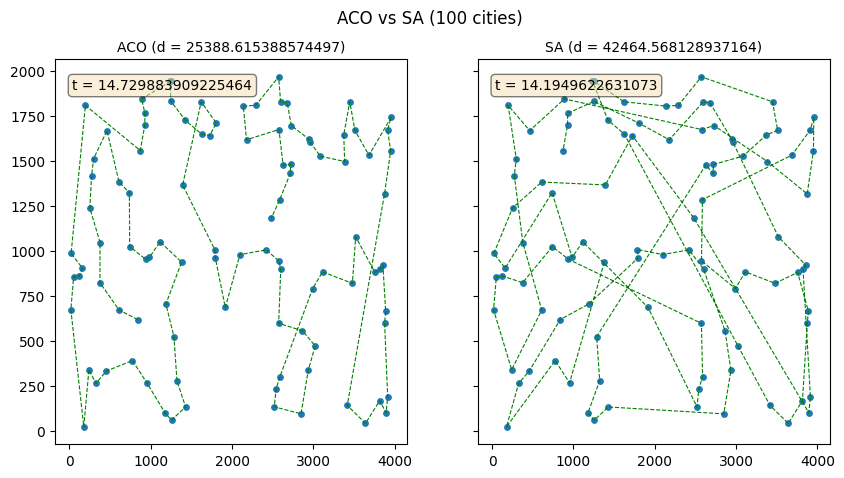

In [36]:
X_path_ACO_vs_3, Y_path_ACO_vs_3 = [], []
for i in opt_path_vs_3:
    X_path_ACO_vs_3.append(graph_vs_3[i][1])
    Y_path_ACO_vs_3.append(graph_vs_3[i][2])
    
X_path_AS_vs_3, Y_path_AS_vs_3 = [], []
for i in P_vs_3:
    X_path_AS_vs_3.append(graph_vs_3[i][1])
    Y_path_AS_vs_3.append(graph_vs_3[i][2])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 5))
fig.suptitle('ACO vs SA (100 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_vs_3, Y_vs_3, marker='o', s=15)
ax1.plot(X_path_ACO_vs_3, Y_path_ACO_vs_3, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO (d = {})'.format(opt_dist_vs_3), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_3), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_vs_3, Y_vs_3, marker='o', s=15)
ax2.plot(X_path_AS_vs_3, Y_path_AS_vs_3, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('SA (d = {})'.format(distancia_vs_3), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(SA_time_3), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# Variable Ants

## 50 ciudades

In [37]:
graph_variable_50 = []

with open('a50.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_variable_50.append([int(city[0]) - 1, float(city[1]), float(city[2])])


X_variable_50, Y_variable_50 = [], []
for i in graph_variable_50:
    X_variable_50.append(i[1])
    Y_variable_50.append(i[2])

In [38]:
# ACO variable ants increasing

start_time_ACO_variable_increasing_50 = time.time()

opt_path_variable_increasing_50, opt_dist_variable_increasing_50 = ACO(graph_variable_50, ants = 50, iterations = 40, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0, variable_ant = (True, "increasing"))

end_time_ACO_variable_increasing_50 = time.time()

ACO_time_variable_increasing_50 = end_time_ACO_variable_increasing_50 - start_time_ACO_variable_increasing_50

# ACO variable ants decreasing

start_time_ACO_variable_decreasing_50 = time.time()

opt_path_variable_decreasing_50, opt_dist_variable_decreasing_50 = ACO(graph_variable_50, ants = 50, iterations = 40, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0, variable_ant = (True, "decreasing"))

end_time_ACO_variable_decreasing_50 = time.time()

ACO_time_variable_decreasing_50 = end_time_ACO_variable_decreasing_50 - start_time_ACO_variable_decreasing_50

# ACO constant ants

start_time_ACO_no_variable_50 = time.time()

opt_path_no_variable_50, opt_dist_no_variable_50 = ACO(graph_variable_50, ants = 50, iterations = 40, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_no_variable_50 = time.time()

ACO_time_no_variable_50 = end_time_ACO_no_variable_50 - start_time_ACO_no_variable_50

Text(0.05, 0.95, 't = 2.775646448135376')

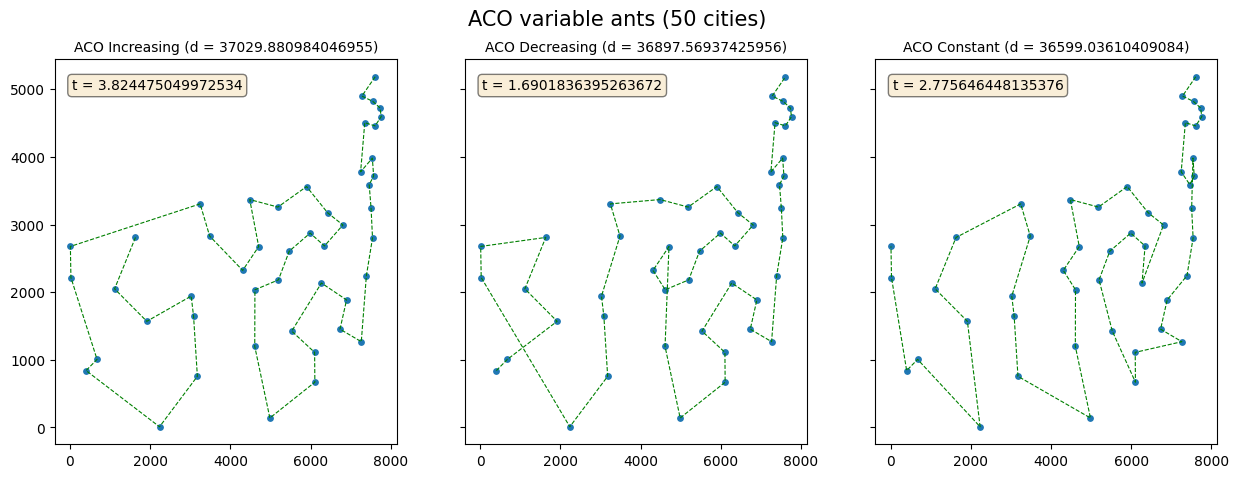

In [39]:
X_path_ACO_variable_increasing_50, Y_path_ACO_variable_increasing_50 = [], []
for i in opt_path_variable_increasing_50:
    X_path_ACO_variable_increasing_50.append(graph_variable_50[i][1])
    Y_path_ACO_variable_increasing_50.append(graph_variable_50[i][2])

X_path_ACO_variable_decreasing_50, Y_path_ACO_variable_decreasing_50 = [], []
for i in opt_path_variable_decreasing_50:
    X_path_ACO_variable_decreasing_50.append(graph_variable_50[i][1])
    Y_path_ACO_variable_decreasing_50.append(graph_variable_50[i][2])

X_path_ACO_no_variable_50, Y_path_ACO_no_variable_50 = [], []
for i in opt_path_no_variable_50:
    X_path_ACO_no_variable_50.append(graph_variable_50[i][1])
    Y_path_ACO_no_variable_50.append(graph_variable_50[i][2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='row', figsize=(15, 5))
fig.suptitle('ACO variable ants (50 cities)',fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_variable_50, Y_variable_50, marker='o', s=15)
ax1.plot(X_path_ACO_variable_increasing_50, Y_path_ACO_variable_increasing_50, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO Increasing (d = {})'.format(opt_dist_variable_increasing_50), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_variable_increasing_50), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_variable_50, Y_variable_50, marker='o', s=15)
ax2.plot(X_path_ACO_variable_decreasing_50, Y_path_ACO_variable_decreasing_50, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('ACO Decreasing (d = {})'.format(opt_dist_variable_decreasing_50), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(ACO_time_variable_decreasing_50), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax3.scatter(X_variable_50, Y_variable_50, marker='o', s=15)    
ax3.plot(X_path_ACO_no_variable_50, Y_path_ACO_no_variable_50, c='g', linewidth=0.8, linestyle="--")
ax3.set_title('ACO Constant (d = {})'.format(opt_dist_no_variable_50), fontsize=10)
ax3.text(0.05, 0.95, 't = {}'.format(ACO_time_no_variable_50), transform=ax3.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

## 100 ciudades

In [40]:
graph_variable_100 = []

with open('a100.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        graph_variable_100.append([int(city[0]) - 1, float(city[1]), float(city[2])])


X_variable_100, Y_variable_100 = [], []
for i in graph_variable_100:
    X_variable_100.append(i[1])
    Y_variable_100.append(i[2])

In [41]:
# ACO variable ants increasing

start_time_ACO_variable_increasing_100 = time.time()

opt_path_variable_increasing_100, opt_dist_variable_increasing_100 = ACO(graph_variable_100, ants = 100, iterations = 40, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0, variable_ant = (True, "increasing"))

end_time_ACO_variable_increasing_100 = time.time()

ACO_time_variable_increasing_100 = end_time_ACO_variable_increasing_100 - start_time_ACO_variable_increasing_100

# ACO variable ants decreasing

start_time_ACO_variable_decreasing_100 = time.time()

opt_path_variable_decreasing_100, opt_dist_variable_decreasing_100 = ACO(graph_variable_100, ants = 100, iterations = 40, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0, variable_ant = (True, "decreasing"))

end_time_ACO_variable_decreasing_100 = time.time()

ACO_time_variable_decreasing_100 = end_time_ACO_variable_decreasing_100 - start_time_ACO_variable_decreasing_100

# ACO constant ants

start_time_ACO_no_variable_100 = time.time()

opt_path_no_variable_100, opt_dist_no_variable_100 = ACO(graph_variable_100, ants = 100, iterations = 40, alpha = 1.0, beta = 10.0, rho = 0.5, Q = 1.0)

end_time_ACO_no_variable_100 = time.time()

ACO_time_no_variable_100 = end_time_ACO_no_variable_100 - start_time_ACO_no_variable_100

Text(0.05, 0.95, 't = 29.807183027267456')

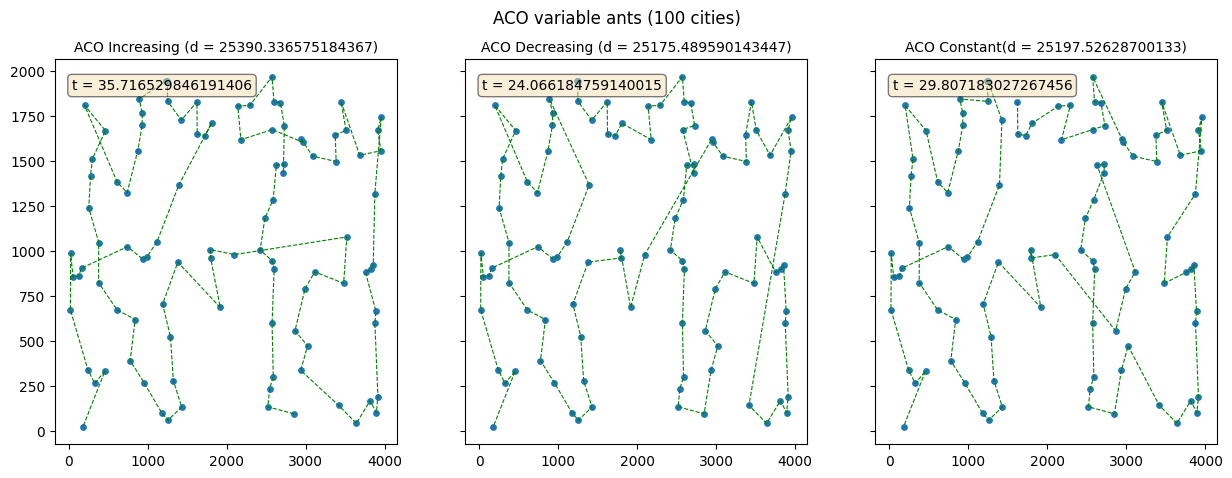

In [42]:
X_path_ACO_variable_increasing_100, Y_path_ACO_variable_increasing_100 = [], []
for i in opt_path_variable_increasing_100:
    X_path_ACO_variable_increasing_100.append(graph_variable_100[i][1])
    Y_path_ACO_variable_increasing_100.append(graph_variable_100[i][2])

X_path_ACO_variable_decreasing_100, Y_path_ACO_variable_decreasing_100 = [], []
for i in opt_path_variable_decreasing_100:
    X_path_ACO_variable_decreasing_100.append(graph_variable_100[i][1])
    Y_path_ACO_variable_decreasing_100.append(graph_variable_100[i][2])

X_path_ACO_no_variable_100, Y_path_ACO_no_variable_100 = [], []
for i in opt_path_no_variable_100:
    X_path_ACO_no_variable_100.append(graph_variable_100[i][1])
    Y_path_ACO_no_variable_100.append(graph_variable_100[i][2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='row', figsize=(15, 5))
fig.suptitle('ACO variable ants (100 cities)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1.scatter(X_variable_100, Y_variable_100, marker='o', s=15)
ax1.plot(X_path_ACO_variable_increasing_100, Y_path_ACO_variable_increasing_100, c='g', linewidth=0.8, linestyle="--")
ax1.set_title('ACO Increasing (d = {})'.format(opt_dist_variable_increasing_100), fontsize=10)
ax1.text(0.05, 0.95, 't = {}'.format(ACO_time_variable_increasing_100), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax2.scatter(X_variable_100, Y_variable_100, marker='o', s=15)
ax2.plot(X_path_ACO_variable_decreasing_100, Y_path_ACO_variable_decreasing_100, c='g', linewidth=0.8, linestyle="--") 
ax2.set_title('ACO Decreasing (d = {})'.format(opt_dist_variable_decreasing_100), fontsize=10)
ax2.text(0.05, 0.95, 't = {}'.format(ACO_time_variable_decreasing_100), transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax3.scatter(X_variable_100, Y_variable_100, marker='o', s=15)    
ax3.plot(X_path_ACO_no_variable_100, Y_path_ACO_no_variable_100, c='g', linewidth=0.8, linestyle="--")
ax3.set_title('ACO Constant(d = {})'.format(opt_dist_no_variable_100), fontsize=10)
ax3.text(0.05, 0.95, 't = {}'.format(ACO_time_no_variable_100), transform=ax3.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73f4cb79-c54a-4638-9be1-ae6a747cab6b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>